In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

from src.utils.DataGenerator import DataGenerator
from src.methods.AALS import AALS
from src.methods.AABernoulli import Bernoulli_Archetypal_Analysis
from src.methods.PCHABer import PCHABer

from src.visualisations.PlotLossArc import plot_loss_arc
from src.visualisations.PlotNMIStability import plot_nmi_stability

from src.utils.NMI import calcNMI


# Initialise some synthetic data


In [2]:
n_samples, n_features, n_arc = 1000, 100, 5
sparsity = 0.4
alpha = 1 
seed = 42 
noise = 0.1 

X= DataGenerator(n_samples, n_features, n_arc, 'Bernoulli', sparsity, alpha, seed, noise,'torch').CreateData()

# X here is features x samples 

# Run for different hyper parameters


In [ ]:
# Find optimal number of archetypes (True = 5)
n_arc_list = [2,3,4,5,6,7,8,9,10]
Losses = np.zeros((len(n_arc_list),10))
Ss = np.zeros((len(n_arc_list),10),dtype=object)

for n in tqdm(n_arc_list):
    for i in range(10):

        C,S,L = Bernoulli_Archetypal_Analysis(X, n)
        Losses[n_arc_list.index(n),i] = L[-1]
        Ss[n_arc_list.index(n),i] = S


  0%|          | 0/9 [00:00<?, ?it/s]

 22%|██▏       | 2/9 [00:54<03:00, 25.75s/it]

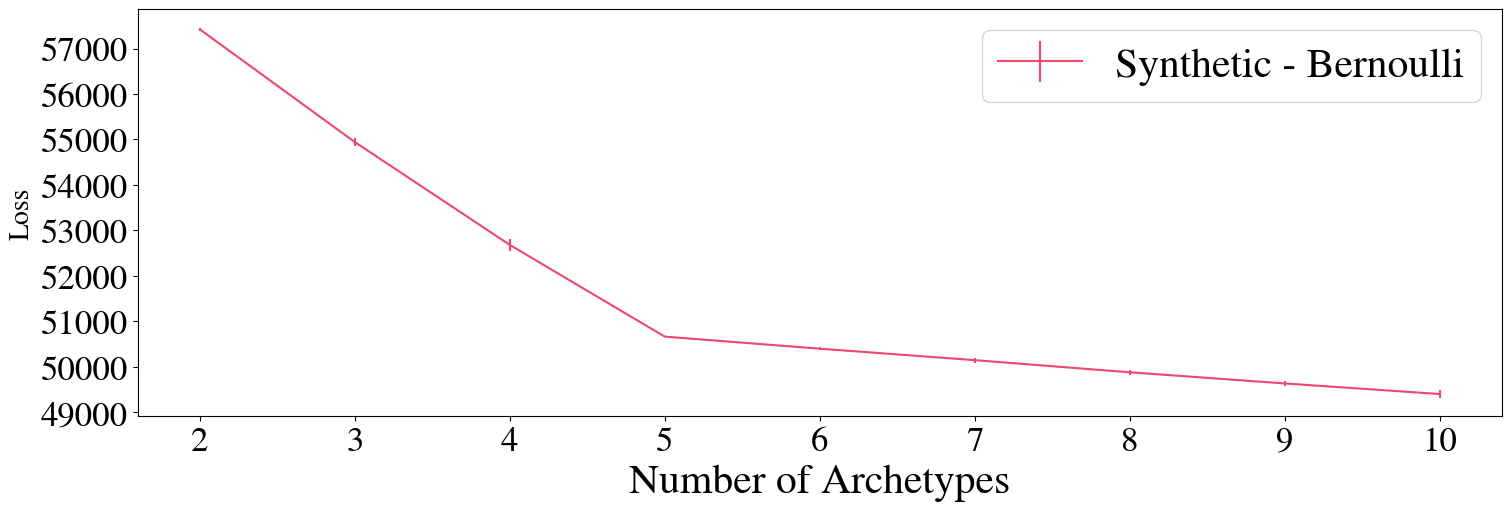

In [4]:

colors = ["#EF476F",  "#06D6A0", "#FFD166", "#073B4C", "#118AB2", "#FF6B6B", "#C8A2C8"]


plot_loss_arc(Losses,n_arc_list,i,colors[0],'Synthetic', 'Bernoulli', savedir = None)

In [5]:
test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)

NMI = np.zeros((len(n_arc_list),len(calcIDX)))

for n in tqdm(n_arc_list):
    for j in range(len(calcIDX)):

        S1 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,0]])
        S2 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,1]])


        NMI[n_arc_list.index(n),j] = calcNMI(S1,S2)



100%|██████████| 9/9 [00:00<00:00, 92.78it/s]


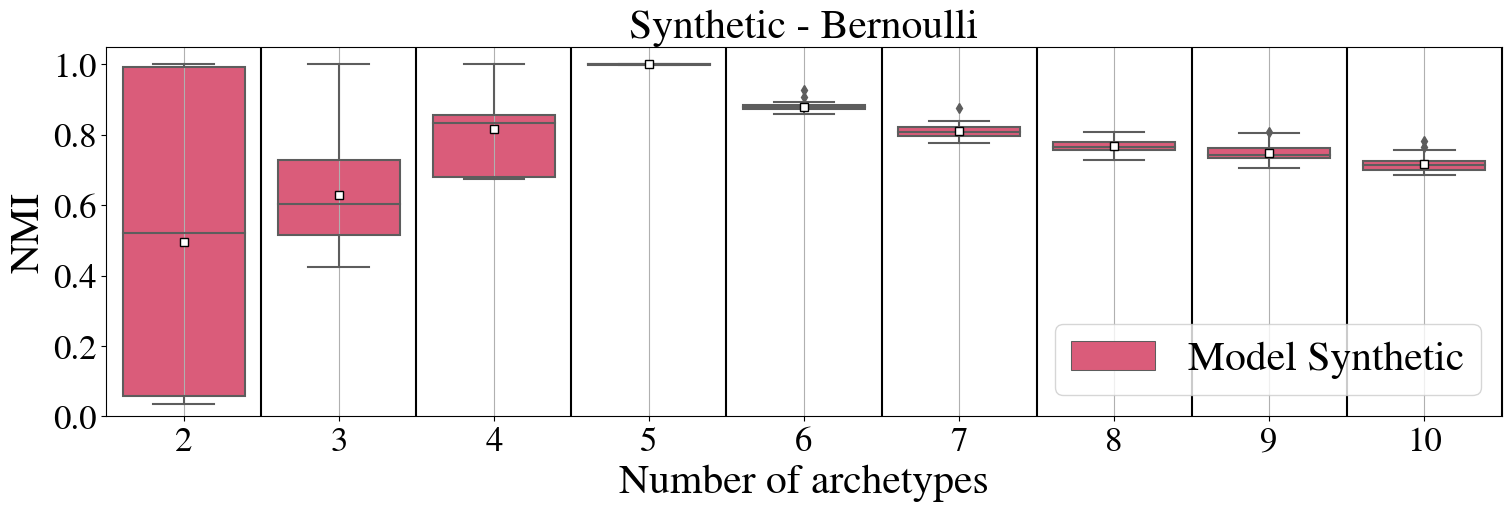

In [6]:
plot_nmi_stability(NMI,n_arc_list, 'Synthetic','Bernoulli',colors)

# Gaussian Data: 

In [7]:
X= DataGenerator(n_samples, n_features, n_arc, 'Gaussian', sparsity, alpha, seed, noise,'torch').CreateData()

In [8]:
# Find optimal number of archetypes (True = 5)
n_arc_list = [2,3,4,5,6,7,8,9,10]
Losses = np.zeros((len(n_arc_list),10))
Ss = np.zeros((len(n_arc_list),10),dtype=object)

for n in tqdm(n_arc_list):
    for i in range(10):

        C,S,L,EV = AALS(X, n)
        Losses[n_arc_list.index(n),i] = L[-1]
        Ss[n_arc_list.index(n),i] = S


100%|██████████| 9/9 [01:26<00:00,  9.58s/it]


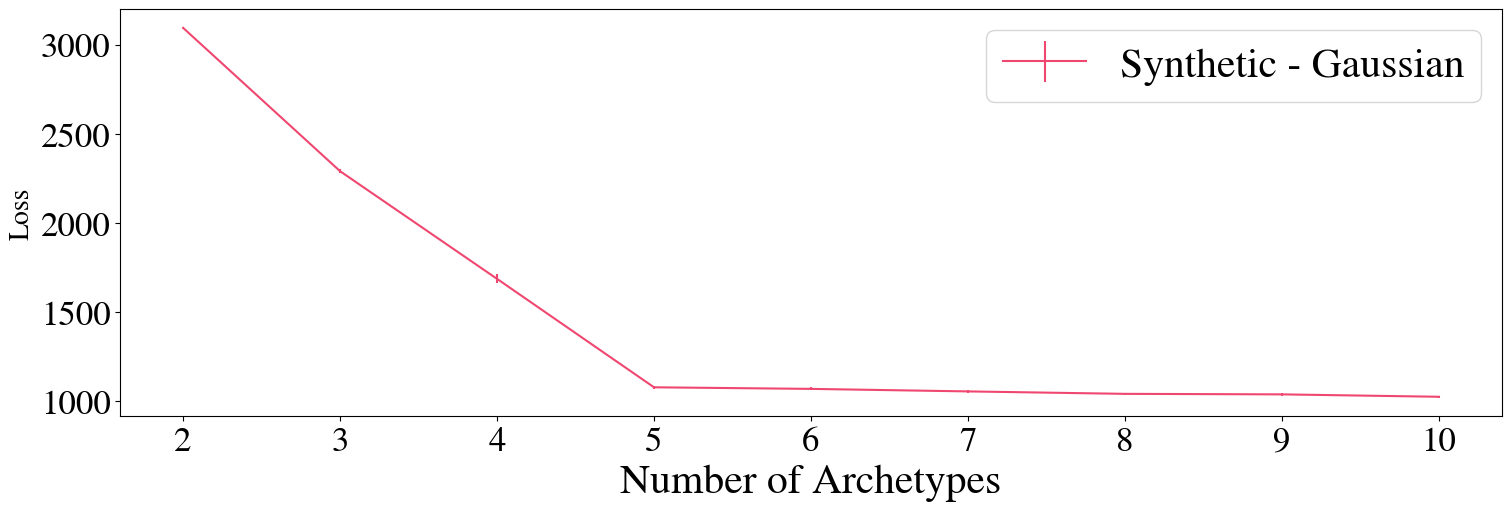

In [10]:

plot_loss_arc(Losses,n_arc_list,i,colors[0],'Synthetic', 'Gaussian', savedir = None)

In [11]:
test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)

NMI = np.zeros((len(n_arc_list),len(calcIDX)))

for n in tqdm(n_arc_list):
    for j in range(len(calcIDX)):

        S1 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,0]])
        S2 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,1]])


        NMI[n_arc_list.index(n),j] = calcNMI(S1,S2)


100%|██████████| 9/9 [00:00<00:00, 155.17it/s]


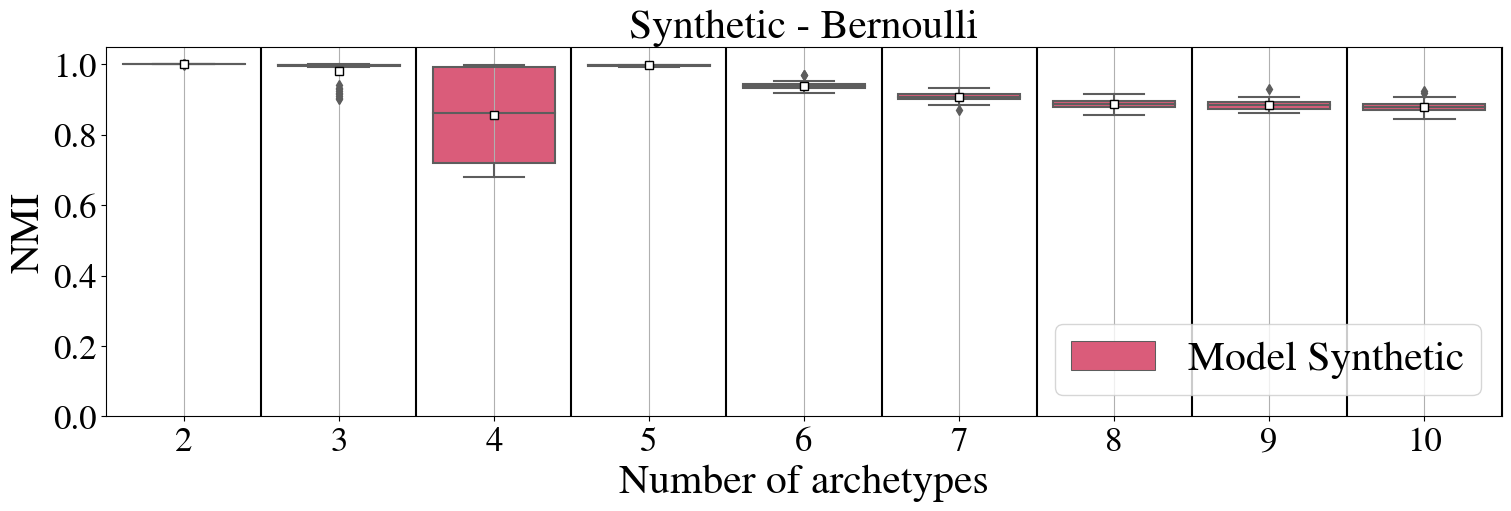

In [12]:
plot_nmi_stability(NMI,n_arc_list, 'Synthetic','Bernoulli',colors)